# Pearson Correlation

Dependencies

In [1]:
import pandas as pd
from scipy.stats import pearsonr

Load the dataset

In [2]:
file_path = 'C:\\Users\\Shadow\\Desktop\\GIT_PE\\survey_data\\survey_data.csv'
dataset = pd.read_csv(file_path)

Selecting relevant columns

In [4]:

appliance_columns = [
    'Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven', 
    'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove'
]

unit_columns = [col for col in dataset.columns if 'unit' in col]


Creating a subset of the dataset with the selected columns

In [5]:
selected_data = dataset[appliance_columns + unit_columns]

Dropping rows with missing values in the selected columns

In [6]:
selected_data = selected_data.dropna()

Calculating the Pearson correlation matrix

In [7]:
correlation_matrix = selected_data.corr()

In [8]:
print(correlation_matrix)

                         Rooms   Members          Fans        Lights  \
Rooms                 1.000000 -0.292770  5.773503e-01  8.006408e-01   
Members              -0.292770  1.000000  5.070926e-01 -6.094494e-01   
Fans                  0.577350  0.507093  1.000000e+00  2.463364e-16   
Lights                0.800641 -0.609449  2.463364e-16  1.000000e+00   
Freezes               0.927173  0.038778  6.882472e-01  6.999132e-01   
Microwave Oven        1.000000 -0.292770  5.773503e-01  8.006408e-01   
Geyser                0.870388 -0.662541  3.015113e-01  7.526178e-01   
AC                    0.962250 -0.281718  6.666667e-01  6.471502e-01   
Washing Machine       0.816497 -0.717137  1.570092e-16  9.805807e-01   
TV                    1.000000 -0.292770  5.773503e-01  8.006408e-01   
PC                    1.000000 -0.292770  5.773503e-01  8.006408e-01   
Induction Stove       1.000000 -0.292770  5.773503e-01  8.006408e-01   
21July unit           0.980987 -0.102273  7.096933e-01  7.022790

Save the correlation matrix to a CSV file

In [9]:
correlation_matrix.to_csv('correlation_matrix.csv')

Visualize correlations using a heatmap

In [17]:
# Dependencies

import seaborn as sns
import matplotlib.pyplot as plt
import os 

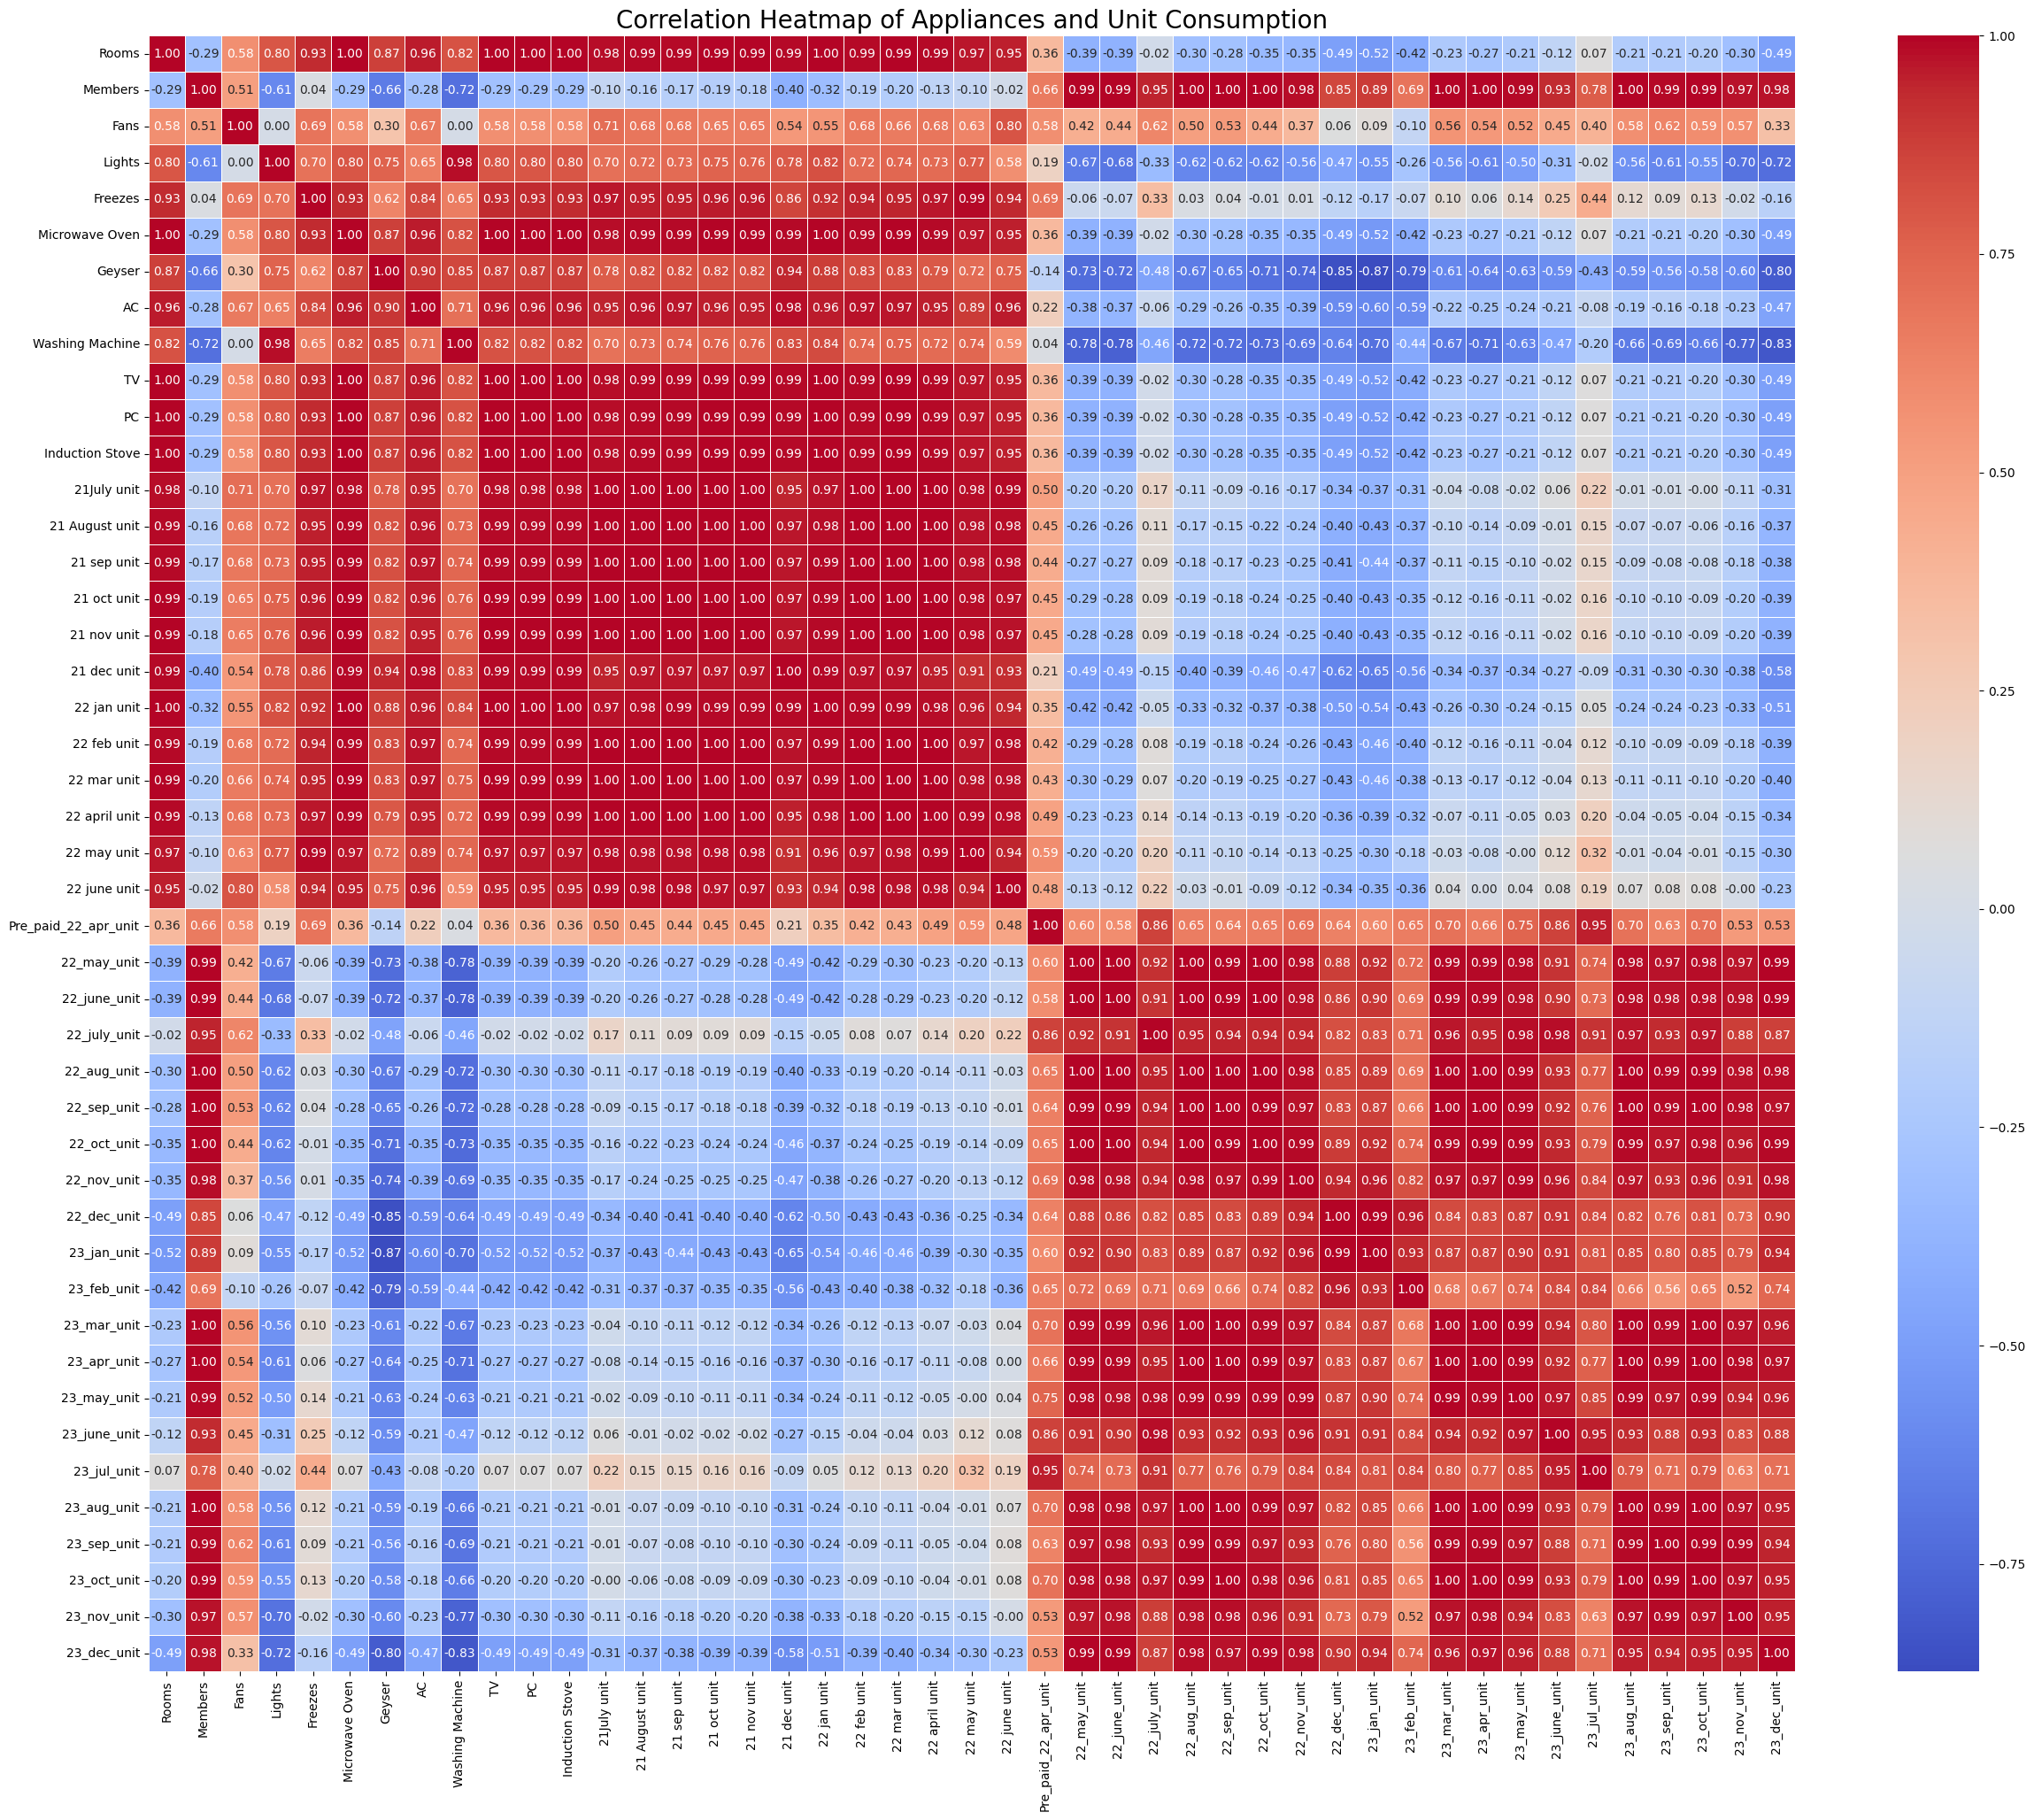

In [21]:

# Setting up the figure size for better visibility
plt.figure(figsize=(30, 24))

# Creating a heatmap for the correlation matrix with larger annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})

# Adding a title for clarity
plt.title('Correlation Heatmap of Appliances and Unit Consumption', fontsize=20)

# Get the directory of the current script
try:
    current_directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_directory = os.getcwd()

# Save the heatmap to a file in the same directory as the script
output_file_path = os.path.join(current_directory, 'correlation_heatmap.png')
plt.savefig(output_file_path, bbox_inches='tight')

# Displaying the heatmap
plt.show()